In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/entertainment/358.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/entertainment/009.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/entertainment/163.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/entertainment/271.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/entertainment/268.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/entertainment/238.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/entertainment/067.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/entertainment/101.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/entertainment/175.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/entertainment/365.txt
/kaggle/input/bbc-news-summary

/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/politics/358.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/politics/009.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/politics/163.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/politics/271.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/politics/268.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/politics/238.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/politics/067.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/politics/101.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/politics/175.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/politics/365.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/Summaries/polit

/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/business/358.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/business/009.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/business/163.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/business/456.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/business/271.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/business/268.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/business/238.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/business/067.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/business/101.txt
/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles/business/175.txt
/kaggle/input/bbc-news-summary/bbc news 

/kaggle/input/bbc-news-summary/BBC News Summary/Summaries/sport/358.txt
/kaggle/input/bbc-news-summary/BBC News Summary/Summaries/sport/009.txt
/kaggle/input/bbc-news-summary/BBC News Summary/Summaries/sport/163.txt
/kaggle/input/bbc-news-summary/BBC News Summary/Summaries/sport/456.txt
/kaggle/input/bbc-news-summary/BBC News Summary/Summaries/sport/271.txt
/kaggle/input/bbc-news-summary/BBC News Summary/Summaries/sport/268.txt
/kaggle/input/bbc-news-summary/BBC News Summary/Summaries/sport/238.txt
/kaggle/input/bbc-news-summary/BBC News Summary/Summaries/sport/067.txt
/kaggle/input/bbc-news-summary/BBC News Summary/Summaries/sport/101.txt
/kaggle/input/bbc-news-summary/BBC News Summary/Summaries/sport/175.txt
/kaggle/input/bbc-news-summary/BBC News Summary/Summaries/sport/365.txt
/kaggle/input/bbc-news-summary/BBC News Summary/Summaries/sport/233.txt
/kaggle/input/bbc-news-summary/BBC News Summary/Summaries/sport/511.txt
/kaggle/input/bbc-news-summary/BBC News Summary/Summaries/sport/

/kaggle/input/bbc-news-summary/BBC News Summary/News Articles/entertainment/075.txt
/kaggle/input/bbc-news-summary/BBC News Summary/News Articles/entertainment/132.txt
/kaggle/input/bbc-news-summary/BBC News Summary/News Articles/entertainment/186.txt
/kaggle/input/bbc-news-summary/BBC News Summary/News Articles/entertainment/307.txt
/kaggle/input/bbc-news-summary/BBC News Summary/News Articles/entertainment/315.txt
/kaggle/input/bbc-news-summary/BBC News Summary/News Articles/entertainment/300.txt
/kaggle/input/bbc-news-summary/BBC News Summary/News Articles/entertainment/194.txt
/kaggle/input/bbc-news-summary/BBC News Summary/News Articles/entertainment/095.txt
/kaggle/input/bbc-news-summary/BBC News Summary/News Articles/entertainment/134.txt
/kaggle/input/bbc-news-summary/BBC News Summary/News Articles/entertainment/329.txt
/kaggle/input/bbc-news-summary/BBC News Summary/News Articles/entertainment/015.txt
/kaggle/input/bbc-news-summary/BBC News Summary/News Articles/entertainment/

In [2]:
!pip install lexrank
!pip install rouge

     |████████████████████████████████| 69 kB 2.9 MB/s eta 0:00:011


In [3]:
# import packages
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np

# %%
import pandas as pd
import seaborn as sns
from gensim.summarization.summarizer import summarize

# %%
from IPython.core.interactiveshell import InteractiveShell

# %%
from lexrank import STOPWORDS, LexRank
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from path import Path

# %%
from rouge import Rouge

In [4]:
InteractiveShell.ast_node_interactivity = "all"


warnings.filterwarnings("ignore")
# code ends here

In [5]:
# %%
data = pd.read_csv("/kaggle/input/textsummarizationprojectdata/train.csv", keep_default_na=False)
data.shape

(32246, 3)

In [6]:
# %%
data.head().T


# %%
data.isna().sum()

,0,1,2,3,4
ID,1,2,3,4,5
Content,It 's official : U.S. President Barack Obama w...,( CNN ) -- Usain Bolt rounded off the world ch...,"Kansas City , Missouri ( CNN ) -- The General ...",Los Angeles ( CNN ) -- A medical doctor in Van...,( CNN ) -- Police arrested another teen Thursd...
Summary,Syrian official : Obama climbed to the top of ...,Usain Bolt wins third gold of world championsh...,The employee in agency 's Kansas City office i...,NEW : A Canadian doctor says she was part of a...,Another arrest made in gang rape outside Calif...


ID         0
Content    0
Summary    0
dtype: int64

In [7]:
# %%
data["Content_length"] = data["Content"].apply(len)
data["Summary_length"] = data["Summary"].apply(len)

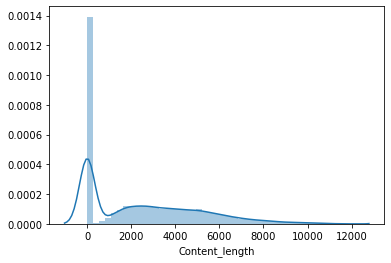

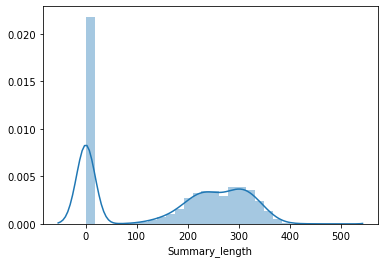

In [8]:
# %%
sns.distplot(a=data["Content_length"], norm_hist=True)
plt.show()
sns.distplot(a=data["Summary_length"], norm_hist=True)
plt.show()

### Model building

- Create a Extractive Summarizer using LexRank
- Create a Extractive Summarizer using Gensim
- Create a Extractive Summarizer using custom code
- Evaluate the model using summary column with the help of Rogue Model.
- Use best out of 3 extractive summarizer having best ROGUE score

Extractive Summarizer using LexRank

In [9]:
# %%
document_dir = Path("/kaggle/input/bbc-news-summary/bbc news summary/BBC News Summary/News Articles")

In [10]:
# %%
documents = []
for filepath in document_dir.walk(match="*.txt"):
    with filepath.open(mode="rt", encoding="utf-8") as fp:
        try:
            documents.append(fp.readlines())
        except UnicodeDecodeError as error:
            continue

In [11]:
#%%
lex = LexRank(documents, stopwords=STOPWORDS["en"])

In [12]:
#%%
def preprocess_document(corpus):
    """Function to preprocess the corpus. Following actions will be performed :-
    - words will be converted to lower case
    - redundant spaces will be removed

    Arguments:
        corpus {[String]} -- [Sentences]

    Returns:
        [String] -- [Cleaned sentence]
    """
    # lower the string and strip spaces
    corpus = corpus.lower()
    corpus = corpus.strip()

    # tokenize the words in document
    word_tokens = sent_tokenize(corpus)

    # join document from the tokens
    corpus = " ".join(word_tokens)

    return corpus

In [13]:
#%%
def getSummaryUsingLexRank(sentences, summary_size=3, threshold=0.1):
    """Function to get summary using LexRank algorithm

    Args:
        sentences ([String]): [Sentences to summarize using LexRank]
        summary_size ([int]): [Size of the required summary]
        threshold ([float]): [Threshold for summary]
    Returns:
        [String]: [Summary of the input text]
    """
    sentences = sent_tokenize(sentences)
    summary = lex.get_summary(sentences, summary_size=3, threshold=0.1)
    summary = "".join(summary)
    yield summary

In [14]:
#%%
sampled_data = data.loc[:10000, :]
sampled_data.head()
sampled_data.shape

,ID,Content,Summary,Content_length,Summary_length
0,1,It 's official : U.S. President Barack Obama w...,Syrian official : Obama climbed to the top of ...,9713,299
1,2,( CNN ) -- Usain Bolt rounded off the world ch...,Usain Bolt wins third gold of world championsh...,3282,175
2,3,"Kansas City , Missouri ( CNN ) -- The General ...",The employee in agency 's Kansas City office i...,6402,244
3,4,Los Angeles ( CNN ) -- A medical doctor in Van...,NEW : A Canadian doctor says she was part of a...,6040,326
4,5,( CNN ) -- Police arrested another teen Thursd...,Another arrest made in gang rape outside Calif...,1739,208


(10001, 5)

In [15]:
from tqdm import tqdm_notebook as tqdm

In [16]:
#%%
lex_summary = []
for i, sentences in tqdm(enumerate(sampled_data["Content"])):
    summary = getSummaryUsingLexRank(sentences)
    lex_summary.append(next(summary))

In [17]:
lex_summary

["Transcript : Read Obama 's full remarks\n\nSyrian crisis : Latest developments\n\nU.N. inspectors leave Syria\n\nObama 's remarks came shortly after U.N. inspectors left Syria , carrying evidence that will determine whether chemical weapons were used in an attack early last week in a Damascus suburb .5 key assertions : U.S. intelligence report on Syria\n\nSyria : Who wants what after chemical weapons horror\n\nReactions mixed to Obama 's speech\n\nA spokesman for the Syrian National Coalition said that the opposition group was disappointed by Obama 's announcement .Why Russia , China , Iran stand by Assad\n\nSyria 's government unfazed\n\nAfter Obama 's speech , a military and political analyst on Syrian state TV said Obama is `` embarrassed '' that Russia opposes military action against Syria , is `` crying for help '' for someone to come to his rescue and is facing two defeats -- on the political and military levels .",
 'The fastest man in the world charged clear of United States 

In [18]:
sampled_data['Lex_Summary'] = lex_summary

In [19]:
sampled_data.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Content,It 's official : U.S. President Barack Obama w...,( CNN ) -- Usain Bolt rounded off the world ch...,"Kansas City , Missouri ( CNN ) -- The General ...",Los Angeles ( CNN ) -- A medical doctor in Van...,( CNN ) -- Police arrested another teen Thursd...
Summary,Syrian official : Obama climbed to the top of ...,Usain Bolt wins third gold of world championsh...,The employee in agency 's Kansas City office i...,NEW : A Canadian doctor says she was part of a...,Another arrest made in gang rape outside Calif...
Content_length,9713,3282,6402,6040,1739
Summary_length,299,175,244,326,208
Lex_Summary,Transcript : Read Obama 's full remarks\n\nSyr...,The fastest man in the world charged clear of ...,The GSA `` virtual employee '' program is diff...,"Burkhart , a 24-year-old German national , has...","Two other juveniles , Ari Abdallah Morales and..."


In [31]:
def calcRougeScores(summary, manual_summary):
    """Function to calculate Rouge Score given the manual summary and machine translated summary

    Args:
        summary ([String]): [Machine translated summary]
        manual_summary ([String]): [Manual Summary for the same text]

    Returns:
        [tuple]: [tuple of F1-score for Rouge 1, Rouge 2 & Rouge L]
    """
    if summary.strip() == "":
        summary = "NA"
    if manual_summary.strip() == "":
        manual_summary = "NA"
    scores = Rouge().get_scores(summary, manual_summary)
    f_score_rouge1 = scores[0].get("rouge-1").get("f")
    f_score_rouge2 = scores[0].get("rouge-2").get("f")
    f_score_rougel = scores[0].get("rouge-l").get("f")
    return f_score_rouge1, f_score_rouge2, f_score_rougel

In [32]:
#%%
f_score_rouge1 = []
f_score_rouge2 = []
f_score_rougel = []    

In [ ]:
for row in sampled_data[["Lex_Summary", "Summary"]].itertuples(index=False):
    f_rouge1, f_rouge2, f_rougel = calcRougeScores(row[0], row[1])
    f_score_rouge1.append(f_rouge1)
    f_score_rouge2.append(f_rouge2)
    f_score_rougel.append(f_rougel)

In [34]:
sampled_data['f1_score_rouge1'] = f_score_rouge1
sampled_data['f1_score_rouge2'] = f_score_rouge2
sampled_data['f1_score_rougel'] = f_score_rougel

In [35]:
sampled_data.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Content,It 's official : U.S. President Barack Obama w...,( CNN ) -- Usain Bolt rounded off the world ch...,"Kansas City , Missouri ( CNN ) -- The General ...",Los Angeles ( CNN ) -- A medical doctor in Van...,( CNN ) -- Police arrested another teen Thursd...
Summary,Syrian official : Obama climbed to the top of ...,Usain Bolt wins third gold of world championsh...,The employee in agency 's Kansas City office i...,NEW : A Canadian doctor says she was part of a...,Another arrest made in gang rape outside Calif...
Content_length,9713,3282,6402,6040,1739
Summary_length,299,175,244,326,208
Lex_Summary,Transcript : Read Obama 's full remarks\n\nSyr...,The fastest man in the world charged clear of ...,The GSA `` virtual employee '' program is diff...,"Burkhart , a 24-year-old German national , has...","Two other juveniles , Ari Abdallah Morales and..."
f1_score_rouge1,0.284404,0.145455,0.347222,0.267516,0.15748
f1_score_rouge2,0.0555556,0,0.0422535,0.0774194,0.016
f1_score_rougel,0.268456,0.141176,0.290909,0.184874,0.137255


In [36]:
avg_f1_score_rouge1 = np.mean(sampled_data['f1_score_rouge1'])
avg_f1_score_rouge2 = np.mean(sampled_data['f1_score_rouge2'])
avg_f1_score_rougel = np.mean(sampled_data['f1_score_rougel'])

In [37]:
print(avg_f1_score_rouge1, avg_f1_score_rouge2, avg_f1_score_rougel)

0.2643679342119725 0.07917450894803547 0.22140904541941814


Using Gensim for Summarization

In [38]:
sampled_data = data.loc[ : 100, ]

In [39]:
sampled_data.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Content,It 's official : U.S. President Barack Obama w...,( CNN ) -- Usain Bolt rounded off the world ch...,"Kansas City , Missouri ( CNN ) -- The General ...",Los Angeles ( CNN ) -- A medical doctor in Van...,( CNN ) -- Police arrested another teen Thursd...
Summary,Syrian official : Obama climbed to the top of ...,Usain Bolt wins third gold of world championsh...,The employee in agency 's Kansas City office i...,NEW : A Canadian doctor says she was part of a...,Another arrest made in gang rape outside Calif...
Content_length,9713,3282,6402,6040,1739
Summary_length,299,175,244,326,208


In [40]:
sampled_data['Gensim_Summary'] = sampled_data['Content'].apply(lambda x : "".join(summarize(x)))

In [41]:
sampled_data.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Content,It 's official : U.S. President Barack Obama w...,( CNN ) -- Usain Bolt rounded off the world ch...,"Kansas City , Missouri ( CNN ) -- The General ...",Los Angeles ( CNN ) -- A medical doctor in Van...,( CNN ) -- Police arrested another teen Thursd...
Summary,Syrian official : Obama climbed to the top of ...,Usain Bolt wins third gold of world championsh...,The employee in agency 's Kansas City office i...,NEW : A Canadian doctor says she was part of a...,Another arrest made in gang rape outside Calif...
Content_length,9713,3282,6402,6040,1739
Summary_length,299,175,244,326,208
Gensim_Summary,It 's official : U.S. President Barack Obama w...,( CNN ) -- Usain Bolt rounded off the world ch...,"Kansas City , Missouri ( CNN ) -- The General ...","Burkhart , a 24-year-old German national , has...",( CNN ) -- Police arrested another teen Thursd...


In [42]:
#%%
f_score_rouge1 = []
f_score_rouge2 = []
f_score_rougel = []

In [43]:
for row in sampled_data[["Gensim_Summary", "Summary"]].itertuples(index=False):
    f_rouge1, f_rouge2, f_rougel = calcRougeScores(row[0], row[1])
    f_score_rouge1.append(f_rouge1)
    f_score_rouge2.append(f_rouge2)
    f_score_rougel.append(f_rougel)

In [44]:
sampled_data['f1_score_rouge1'] = f_score_rouge1
sampled_data['f1_score_rouge2'] = f_score_rouge2
sampled_data['f1_score_rougel'] = f_score_rougel

In [45]:
sampled_data.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Content,It 's official : U.S. President Barack Obama w...,( CNN ) -- Usain Bolt rounded off the world ch...,"Kansas City , Missouri ( CNN ) -- The General ...",Los Angeles ( CNN ) -- A medical doctor in Van...,( CNN ) -- Police arrested another teen Thursd...
Summary,Syrian official : Obama climbed to the top of ...,Usain Bolt wins third gold of world championsh...,The employee in agency 's Kansas City office i...,NEW : A Canadian doctor says she was part of a...,Another arrest made in gang rape outside Calif...
Content_length,9713,3282,6402,6040,1739
Summary_length,299,175,244,326,208
Gensim_Summary,It 's official : U.S. President Barack Obama w...,( CNN ) -- Usain Bolt rounded off the world ch...,"Kansas City , Missouri ( CNN ) -- The General ...","Burkhart , a 24-year-old German national , has...",( CNN ) -- Police arrested another teen Thursd...
f1_score_rouge1,0.156364,0.32,0.216216,0.156425,0.183673
f1_score_rouge2,0.0693431,0.0813008,0.0680272,0.0337079,0.0208333
f1_score_rougel,0.220641,0.273684,0.265193,0.138614,0.125


In [46]:
avg_f1_score_rouge1 = np.mean(sampled_data['f1_score_rouge1'])
avg_f1_score_rouge2 = np.mean(sampled_data['f1_score_rouge2'])
avg_f1_score_rougel = np.mean(sampled_data['f1_score_rougel'])

In [47]:
print(avg_f1_score_rouge1, avg_f1_score_rouge2, avg_f1_score_rougel)

0.2110869867332362 0.06892190069066076 0.20654347674393544


Using Abstractive Summarization

In [48]:
#Preprocess function. lower case and no stop words
def preprocess(sentence):
    return [word.lower() for word in word_tokenize(sentence) if (word not in stopwords and word.isalpha())]

In [49]:
def text_rank_sent(graph,node_weights,d=.85,iterations=20):
    weight_sum = np.sum(graph,axis=0)
    print (weight_sum)
    while iterations >0:
        for i in range(len(node_weights)):
            temp = 0.0
            for j in range(len(node_weights)):
                temp += graph[i,j]*node_weights[j]/weight_sum[j]
                print (graph[i,j],node_weights[j],weight_sum[j],graph[i,j]*node_weights[j]/weight_sum[j])
            print ("temp",i, temp)
            node_weights[i] = 1-d+(d*temp)
        iterations-=1

In [50]:
def pageRankSummary(text):
    #split text into sentences using nltk 
    sentences = sent_tokenize(text)
    #Preprocess all sentences
    processed_sentence = list(map(preprocess,sentences))
    #Total number of nodes(sentences)
    nodes_count = len(list(processed_sentence))

    #create an empty matrix of N x N. N is number of sentences
    graph = np.zeros((nodes_count,nodes_count)) 
    for i in range(nodes_count):
        try:
            for j in range(i+1,nodes_count):
                #TextRank computation. Common words in sentences i & j divide by total words in i &j
                graph[i,j] = float(len(set(processed_sentence[i])&set(processed_sentence[j])))/(len(processed_sentence[i])+len(processed_sentence[j]))
                graph[j,i] = graph[i,j]
        except:
            continue
    #Method to calculate Page Rank (PR) score for each and every sentence.
    #PR of sentence x is simply sum of score of all sentences pointing to x.
    #Final score is multiplied by a damping factor, generally 0.85
    node_weights = np.ones(nodes_count)
    #Print Top N sentences

    top_n = 3
    top_index = [i for i,j in sorted(enumerate(node_weights), key=lambda x: x[1],reverse=True)[:top_n]]

    summary = [sentences[i] for i in top_index]
    return summary

In [51]:
stopwords = set(stopwords.words('english'))

In [53]:
sampled_data = data.loc[ : 1000, :]
sampled_data.shape

(1001, 5)

In [55]:
sampled_data.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Content,It 's official : U.S. President Barack Obama w...,( CNN ) -- Usain Bolt rounded off the world ch...,"Kansas City , Missouri ( CNN ) -- The General ...",Los Angeles ( CNN ) -- A medical doctor in Van...,( CNN ) -- Police arrested another teen Thursd...
Summary,Syrian official : Obama climbed to the top of ...,Usain Bolt wins third gold of world championsh...,The employee in agency 's Kansas City office i...,NEW : A Canadian doctor says she was part of a...,Another arrest made in gang rape outside Calif...
Content_length,9713,3282,6402,6040,1739
Summary_length,299,175,244,326,208


In [56]:
sampled_data['PageRank_Summary'] = sampled_data['Content'].apply(lambda x : "".join(pageRankSummary(x)))

In [57]:
sampled_data.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Content,It 's official : U.S. President Barack Obama w...,( CNN ) -- Usain Bolt rounded off the world ch...,"Kansas City , Missouri ( CNN ) -- The General ...",Los Angeles ( CNN ) -- A medical doctor in Van...,( CNN ) -- Police arrested another teen Thursd...
Summary,Syrian official : Obama climbed to the top of ...,Usain Bolt wins third gold of world championsh...,The employee in agency 's Kansas City office i...,NEW : A Canadian doctor says she was part of a...,Another arrest made in gang rape outside Calif...
Content_length,9713,3282,6402,6040,1739
Summary_length,299,175,244,326,208
PageRank_Summary,It 's official : U.S. President Barack Obama w...,( CNN ) -- Usain Bolt rounded off the world ch...,"Kansas City , Missouri ( CNN ) -- The General ...",Los Angeles ( CNN ) -- A medical doctor in Van...,( CNN ) -- Police arrested another teen Thursd...


In [59]:
#%%
f_score_rouge1 = []
f_score_rouge2 = []
f_score_rougel = []

In [60]:
for row in sampled_data[["PageRank_Summary", "Summary"]].itertuples(index=False):
    f_rouge1, f_rouge2, f_rougel = calcRougeScores(row[0], row[1])
    f_score_rouge1.append(f_rouge1)
    f_score_rouge2.append(f_rouge2)
    f_score_rougel.append(f_rougel)

In [61]:
sampled_data['f1_score_rouge1'] = f_score_rouge1
sampled_data['f1_score_rouge2'] = f_score_rouge2
sampled_data['f1_score_rougel'] = f_score_rougel

In [62]:
sampled_data.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Content,It 's official : U.S. President Barack Obama w...,( CNN ) -- Usain Bolt rounded off the world ch...,"Kansas City , Missouri ( CNN ) -- The General ...",Los Angeles ( CNN ) -- A medical doctor in Van...,( CNN ) -- Police arrested another teen Thursd...
Summary,Syrian official : Obama climbed to the top of ...,Usain Bolt wins third gold of world championsh...,The employee in agency 's Kansas City office i...,NEW : A Canadian doctor says she was part of a...,Another arrest made in gang rape outside Calif...
Content_length,9713,3282,6402,6040,1739
Summary_length,299,175,244,326,208
PageRank_Summary,It 's official : U.S. President Barack Obama w...,( CNN ) -- Usain Bolt rounded off the world ch...,"Kansas City , Missouri ( CNN ) -- The General ...",Los Angeles ( CNN ) -- A medical doctor in Van...,( CNN ) -- Police arrested another teen Thursd...
f1_score_rouge1,0.45,0.293103,0.413333,0.317647,0.15873
f1_score_rouge2,0.151899,0.0877193,0.202703,0.0714286,0.016129
f1_score_rougel,0.352941,0.270833,0.393162,0.15748,0.12766


In [63]:
avg_f1_score_rouge1 = np.mean(sampled_data['f1_score_rouge1'])
avg_f1_score_rouge2 = np.mean(sampled_data['f1_score_rouge2'])
avg_f1_score_rougel = np.mean(sampled_data['f1_score_rougel'])

In [64]:
print(avg_f1_score_rouge1, avg_f1_score_rouge2, avg_f1_score_rougel)

0.2871416733652813 0.102996462258118 0.2449496876725036


Prediction on Test set

In [65]:
# %%
test_data = pd.read_csv("/kaggle/input/textsummarizationprojectdata/test.csv", keep_default_na=False)
test_data.shape

(12246, 2)

In [67]:
test_data.head().T

,0,1,2,3,4
ID,20001,20002,20003,20004,20005
Content,( CNN ) -- It looks like there will not be a s...,Vice President Joe Biden said on Wednesday his...,( CNN ) -- While his jockey starved himself to...,Peace talks between Israelis and Palestinians ...,( EW.com ) -- `` The Office '' ends its nine-s...


In [68]:
test_data['Summary'] = data['Content'].apply(lambda x : "".join(pageRankSummary(x)))

In [69]:
test_data.head().T

,0,1,2,3,4
ID,20001,20002,20003,20004,20005
Content,( CNN ) -- It looks like there will not be a s...,Vice President Joe Biden said on Wednesday his...,( CNN ) -- While his jockey starved himself to...,Peace talks between Israelis and Palestinians ...,( EW.com ) -- `` The Office '' ends its nine-s...
Summary,It 's official : U.S. President Barack Obama w...,( CNN ) -- Usain Bolt rounded off the world ch...,"Kansas City , Missouri ( CNN ) -- The General ...",Los Angeles ( CNN ) -- A medical doctor in Van...,( CNN ) -- Police arrested another teen Thursd...


In [ ]:
test_data[['ID', 'Summary']].to_csv('summary_using_pagerank.csv', index=False)